In [12]:
from si import *
from g2Fitter import *
import pickle
enable_atlas_python()

/home/jlab/miniconda3/lib/python3.7/site-packages/ROOT/_facade.py:121: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  return _orig_ihook(name, *args, **kwds)
/home/jlab/miniconda3/lib/python3.7/site-packages/luigi/scheduler.py:211: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  class OrderedSet(collections.MutableSet):
/home/jlab/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [13]:
data = pickle.load(open("worker_startTimeScanByCalo__home_labounty_l_f4f00a7010__output_hist_startTimeScanByCalo.pickle","rb"))

/home/jlab/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='worker_startTimeScanByCalo__home_labounty_l_f4f00a7010__output_hist_startTimeScanByCalo.pickle'>
  """Entry point for launching an IPython kernel.


In [14]:
data['startTimeScan'][1]

[['N', '#tau', 'A', 'R', '#phi'],
 [29.987212276214834,
  30.88235294117647,
  31.926683716965048,
  32.971014492753625,
  33.86615515771526,
  34.910485933503836,
  35.954816709292416,
  36.99914748508099,
  37.89428815004263,
  38.9386189258312,
  39.98294970161978,
  40.87809036658142,
  41.92242114236999,
  42.96675191815857,
  43.86189258312021],
 {'N': [14121907.778105553,
   14122703.239217812,
   14122670.416852992,
   14122038.479957452,
   14123844.156241091,
   14123279.430735705,
   14123210.764927274,
   14124189.328111617,
   14122698.410733653,
   14123624.899527466,
   14124025.526646165,
   14123370.672871238,
   14125265.65854944,
   14124120.048764871,
   14123790.347817734],
  '#tau': [64.43141889337628,
   64.42994799329188,
   64.43000661139322,
   64.43116283580291,
   64.42788483031447,
   64.42890016326402,
   64.42902704303523,
   64.4272815770692,
   64.4299236151702,
   64.42829675022138,
   64.42759082578054,
   64.42872754673049,
   64.4254565029059,
   64

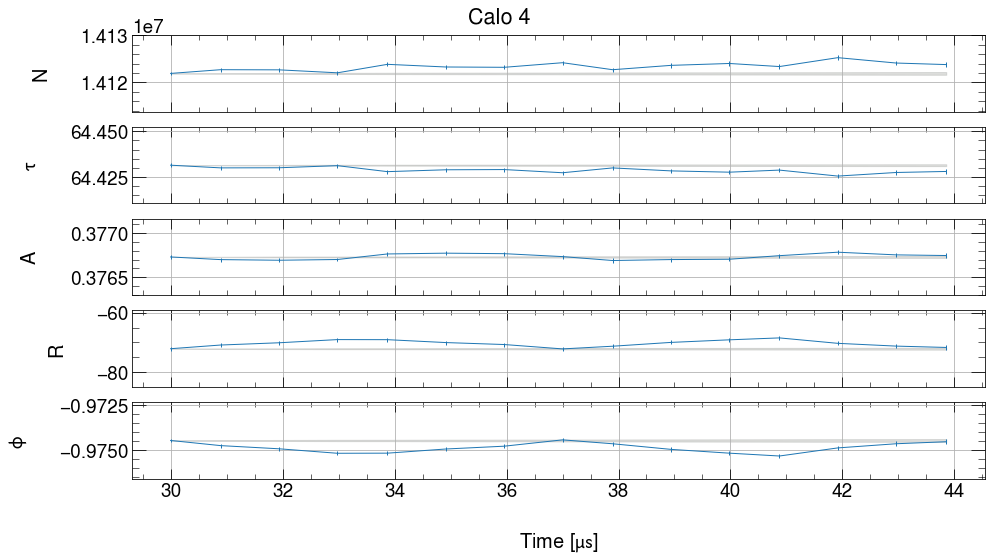

In [17]:
calo = 4

names, times, pars, parErrs = data['startTimeScan'][calo]

fig,ax = plt.subplots(len(names),1, figsize=(15,8), sharex=True)
for i, name in enumerate(names):
    plt.sca(ax[i])
    plt.errorbar(times, pars[name],yerr=parErrs[name])
    plt.ylabel(convertRootLabelsToPython(name))
    
    kawall_band = [np.sqrt( x**2 - parErrs[name][0]**2  ) for x in parErrs[name]]
    plt.fill_between(times, 
                 [pars[name][0] + kawall_band[i] for i,x in enumerate(times)], 
                 [pars[name][0] - kawall_band[i] for i,x in enumerate(times)],
                 alpha = 0.3, interpolate=True, color='xkcd:grey')
    
    plt.ylim(pars[name][0] - parErrs[name][0]*20, 
             pars[name][0] + parErrs[name][0]*20)
    
    plt.grid()
# plt.tight_layout()
plt.suptitle(f"Calo {calo}")
plt.xlabel("Time [$\\mu s$]")
plt.show()